# Projeto 1 - Predição da precificação de casas 
## House Sales in King County, USA - Kaggle

## Introdução

Este é um conjunto de dados armazenado no Kaggle, uma plataforma de estudo e competições de Ciência de Dados. Segue a tradução sobre o conjunto de dados.

**"Este conjunto de dados contém preços de venda de casas para King County, que inclui Seattle. Inclui casas vendidas entre maio de 2014 e maio de 2015."**

Segue a descrição das variaveis:

- id - ID exclusivo para cada casa vendida
- date - data da venda
- price - preço da venda
- bedrooms - número de quartos
- bathrooms - número de banheiros, onde 0.5 representa um quarto com vaso sanitário mas, sem chuveiro
- sqft_living - tamanho interno da casa em pés quadrados
- sqft_lot - tamanho do lote em pés quadrados
- floors - número de andares
- waterfront - vista para praia (1 - vista para praia, 0 - sem vista para a praia)
- view - índice de 0 a 4 de quão boa é a vista do imóvel
- condition - índice de 1 a 5 sobre a condição da casa
- grade - nota de qualidade (baseado no sistema de classificação do King County) (1 a 3 - fica aquém da construção e design de edifícios, 7 -  tem um nível médio de construção e design e 11 a 13 - tem um alto nível de construção e design)
- sqft_above - Pés quadrados do espaço interno da habitação que está acima do nível do solo
- sqft_basement - Pés quadrados do espaço interno da habitação que está abaixo do nível do solo
- yr_built - ano de construção
- yr_renovated - ano da ultima reforma
- zipcode - código postal da casa
- lat - latitude
- long - longitude
- sqft_living15 - Pés quadrados do espaço habitacional interior para os 15 vizinhos mais próximos
- sqft_lot15 - Pés quadrados dos lotes dos 15 vizinhos mais próximos

# Sobre este projeto

Nes projeto será utilizada a regressão linear para predizer os preços das casas de acordo com as features fornecidas.

# Base de dados

- Acessem o link - https://www.kaggle.com/datasets/harlfoxem/housesalesprediction para ter acesso a base de dados utilizada.

Antes de dar início a resolução das questões é necessário realizar uma primeira análise dos dados a fim de identificar potenciais problemas na fonte de dados. Tais problemas podem ser dados faltantes ou preenchidos incorretamente. Isto deve sempre ser feito pois não devemos confiar cegamente na fonte de dados e poderá evitar problemas futuros.


## Bibliotecas necessárias

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Carga inicial dos dados

In [28]:
kc_house_data = pd.read_csv('kc_house_data.csv')
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

O info do DataFrame mostra que o mesmo possui 20 colunas e 21613 linhas. Não há valores nulos. A coluna data foi reconhecida como object o correto seria que ela fosse interpretada como datetime.

## Transformando valores da coluna date em datetime

In [29]:
kc_house_data['date']= pd.to_datetime(kc_house_data['date'], format='%Y%m%dT%H%M%S')

## Média, Mínimo e Máximo das variáveis numéricas

In [30]:
kc_house_data.drop(['id', 'date', 'zipcode'], axis=1).agg(['min', 'mean', 'max'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.00000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.40943,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.00000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


O preço (```price```) dos imóveis varia entre US$ 75.000,00 e US$ 7.700.000,00 com média de US$ 540.081,00. A visão dos valores mínimos mostra a existência de imóveis sem quartos e ou banheiros. Caso o imóvel seja do tipo estúdio justifica-se a colocação de zero quartos. Porém é incomum a existência de imóveis residencias sem banheiros. Na célula a seguir é feito o cálculo para contagem da quantidade de registros sem banheiros. Os imóveis foram construídos entre 1900 e 2015.

In [31]:
print('Registros com número de banheiros igual a zero:')
print(kc_house_data['bathrooms'].loc[kc_house_data['bathrooms'] == 0].count())
print('Registros com número de banheiros menor que 1:')
print(kc_house_data['bathrooms'].loc[kc_house_data['bathrooms'] < 1].count())
print('Registros com número de banheiros igual a 1:')
print(kc_house_data['bathrooms'].loc[kc_house_data['bathrooms'] == 1].count())

Registros com número de banheiros igual a zero:
10
Registros com número de banheiros menor que 1:
86
Registros com número de banheiros igual a 1:
3852


Assim existem apenas 10 registros com número zero de banheiros e um total de 86 registros com número de banheiros < 1. Considerando-se, portanto, o baixo número de registros, em comparação com o total, aliado ao fato de ser incomum a existência de imóveis residenciais sem banheiros, aos registros com número de banheiros inferior a 1 será atribuído a quantidade de 1 banheiro.

## Ajustando número de banheiros

In [32]:
kc_house_data[kc_house_data['bathrooms'] < 1]['bathrooms'] = 1

C:\Users\duart\AppData\Local\Temp/ipykernel_26184/867993729.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Conversão das unidades de medida

Como as questões a seguir pedem as unidades de área em metros quadrados será feita a conversão das unidades de área em pés quadrados para metros quadrados. Será utilizado o seguinte fator de conversão.

1 ft² = 0.092903 m²

In [33]:
sqft_columns = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']
sqmt_columns = ['sqmt_living', 'sqmt_lot', 'sqmt_above', 'sqmt_basement', 'sqmt_living15', 'sqmt_lot15']
kc_house_data[sqmt_columns] = kc_house_data[sqft_columns] * 0.092903
kc_house_data.drop(sqft_columns, axis=1, inplace=True)
kc_house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   floors         21613 non-null  float64       
 6   waterfront     21613 non-null  int64         
 7   view           21613 non-null  int64         
 8   condition      21613 non-null  int64         
 9   grade          21613 non-null  int64         
 10  yr_built       21613 non-null  int64         
 11  yr_renovated   21613 non-null  int64         
 12  zipcode        21613 non-null  int64         
 13  lat            21613 non-null  float64       
 14  long           21613 non-null  float64       
 15  sqmt_living    2161

# Levantamento de hipóteses iniciais

Hipótese 01 - A idade do imóvel juntamente com o tempo decorrido desde a última estão relacionados com o preço do mesmo?

Hipótese 02 - A localicalização do imóvel é relevante para precificar o imóvel? Existe alguma região onde predominam imóveis de preços elevados?

# Visualização dos dados

Quando tratamos de visualização de dados é importande destacar visualizações que facilitem a interpretação dos dados pelo público final. Gráficos são ferramentas visuais capazes de resumir de forma eficaz o conteúdo de conjuntos de dados. Através de gráficos, bem elaborados, é possível transmitir ao público um resumo rápido da informação contida nos dados, de forma legível a todos que o vêem. Tabelas e resumos são eficazes para publicação em meios onde se há um suporte textual, assim não são capazes de transmitir a informação contida nos dados de maneira tão rápida e eficaz quanto gráficos.

Para a solução das hióteses propotas no item anterior podem ser geradas duas visualizações:
* Gráficos que mostre a relação entre o preço dos imóveis e suas idades.
* Gráfico com a distribuição espacial dos preços dos imóveis.

Como uma das hipóteses propostas está relacionada a idade dos imóveis, na próxima célula é cálculada a idade dos imóveis no momento da venda.

In [34]:
idade = kc_house_data['date']
calc_idade = lambda x: x['date'].year - x['yr_built']
kc_house_data['age'] = kc_house_data.apply(calc_idade, axis=1)

Na célula a seguir são calculados os anos passados entre a última reforma do imóvel e a data de venda do mesmo.

In [35]:
def tempo_reforma(df):
    if df['yr_renovated'] != 0:                             # caso o valor yr_renovated seja diferente de zero
        return df['yr_renovated'] - df['yr_built']          # então o imóvel foi reformado e pode-se calcular os anos entre a reforma e a data da venda
    return df['age']                                        # caso contrário o imóvel nunca foi renovado e será retornada a propria idade do imóvel

kc_house_data['yrs_renovated'] = kc_house_data.apply(tempo_reforma, axis=1)

Casas com maior preço de venda do dataset.

In [36]:
most_expensive_properties = kc_house_data.loc[kc_house_data.price > 6e6]
most_expensive_properties

,id,date,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,...,lat,long,sqmt_living,sqmt_lot,sqmt_above,sqmt_basement,sqmt_living15,sqmt_lot15,age,yrs_renovated
3914,9808700762,2014-06-11,7062500.0,5,4.50,2.0,1,2,3,11,...,47.6500,-122.214,932.74612,3467.604475,713.49504,219.25108,365.10879,2364.288447,74,61
7252,6762700020,2014-10-13,7700000.0,6,8.00,2.5,0,3,4,13,...,47.6298,-122.323,1119.48115,2564.122800,796.17871,323.30244,366.03782,817.546400,104,77
9254,9208900037,2014-09-19,6885000.0,6,7.75,2.0,0,4,3,13,...,47.6305,-122.240,918.81067,2914.738722,823.12058,95.69009,421.77962,3969.745190,13,13


### Plot do comparativo entre os preços e venda e a idade dos imóveis e tempo de reforma.

Text(0.5, 1.0, 'Relação entre a anos de renovação dos imóveis e o seu preço de venda')

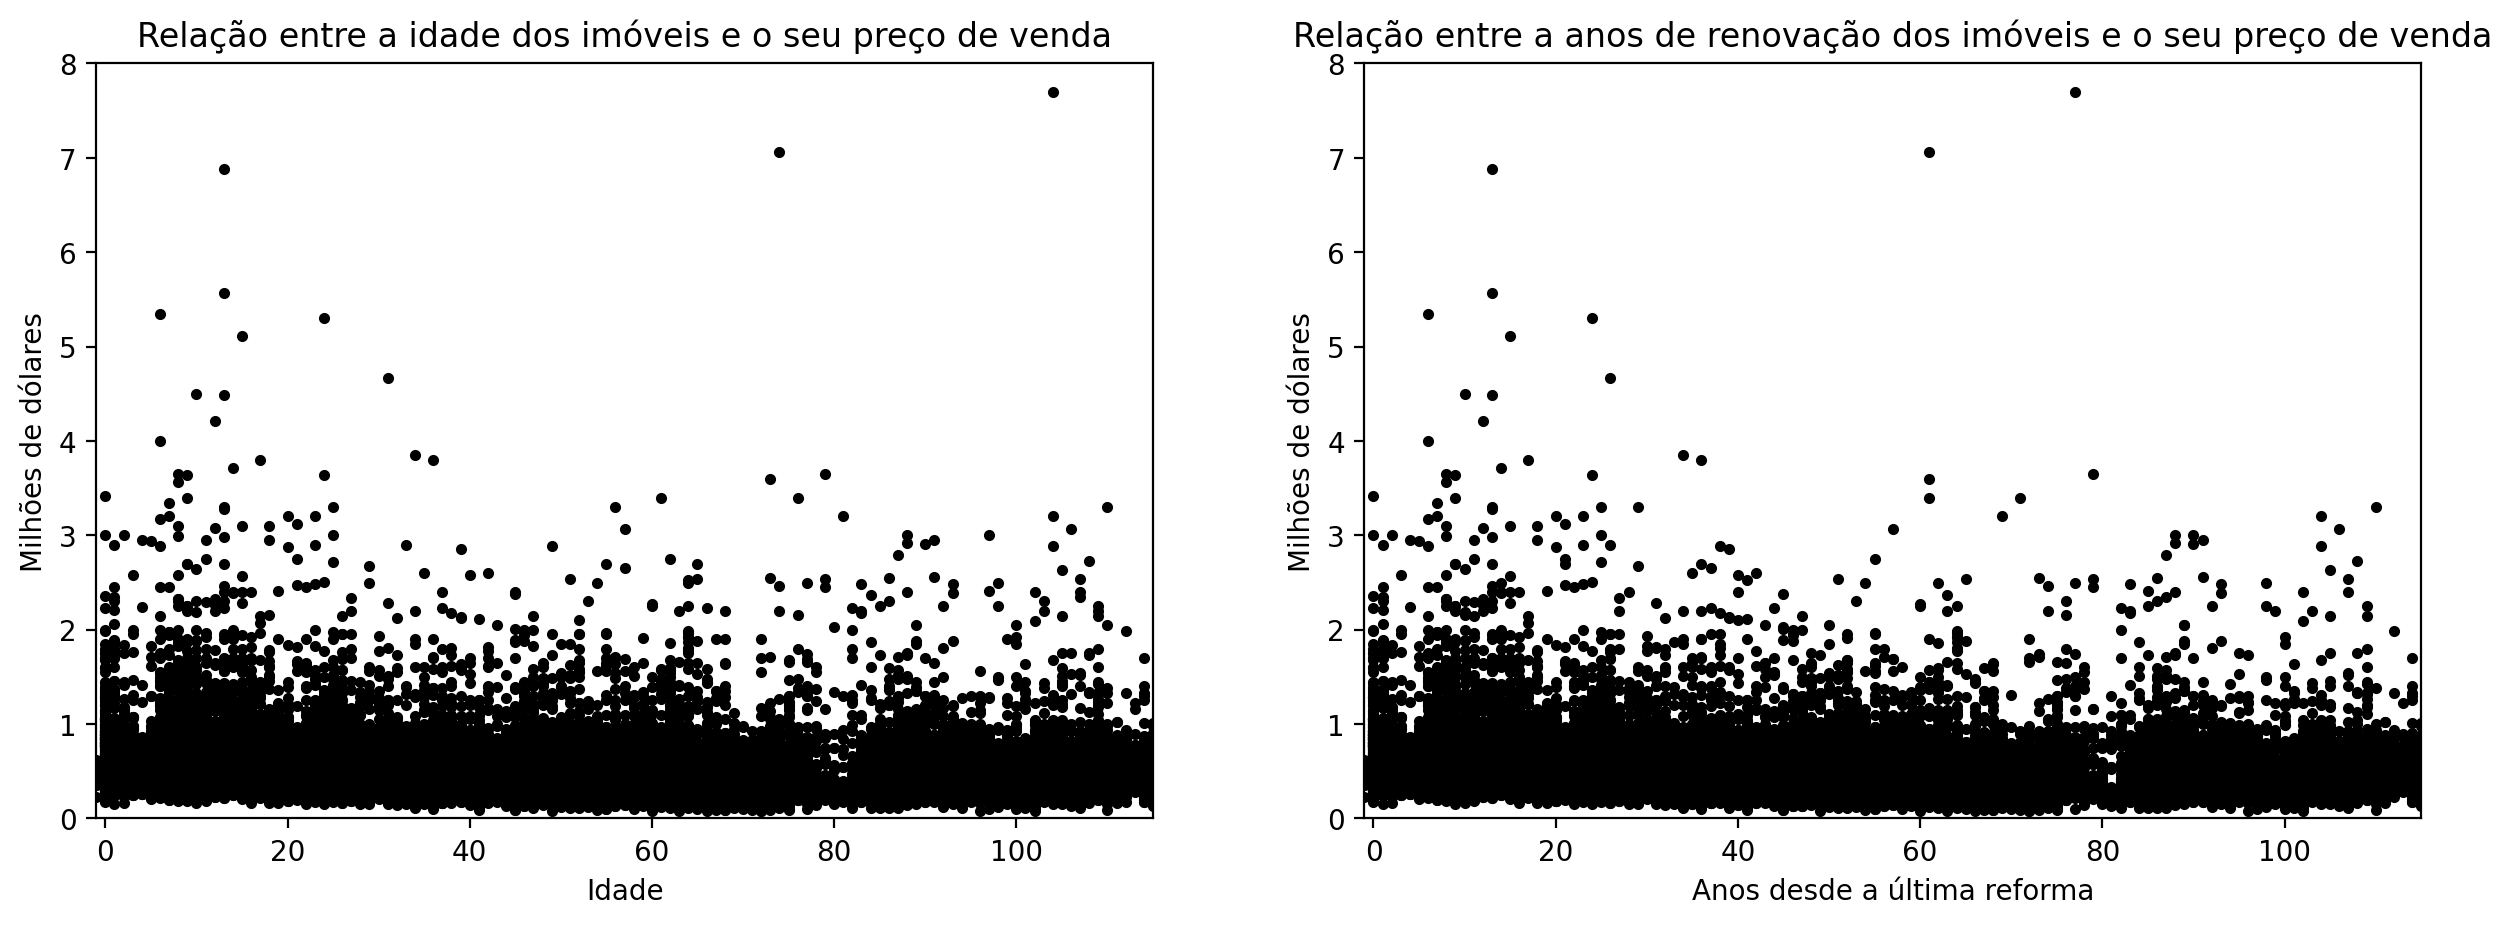

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), dpi=200)

ax[0].scatter(kc_house_data['age'], kc_house_data['price']/1e6, color='k', marker='.')
ax[0].set_xlim(kc_house_data['age'].min(), kc_house_data['age'].max())
ax[0].set_ylim(0, 8)
ax[0].set_xlabel('Idade')
ax[0].set_ylabel('Milhões de dólares')
ax[0].set_title('Relação entre a idade dos imóveis e o seu preço de venda')

ax[1].scatter(kc_house_data['yrs_renovated'], kc_house_data['price']/1e6, color='k', marker='.')
ax[1].set_xlim(-1, kc_house_data['yrs_renovated'].max())
ax[1].set_ylim(0, 8)
ax[1].set_xlabel('Anos desde a última reforma')
ax[1].set_ylabel('Milhões de dólares')
ax[1].set_title('Relação entre a anos de renovação dos imóveis e o seu preço de venda')

### Mapa da distribuição espacial do preço dos imóveis.

In [38]:
fig = px.density_mapbox(kc_house_data, lat='lat', lon='long', z='price', radius=4,
center = dict(lat=47.48, lon=-122.1), mapbox_style="open-street-map", 
width=450, height=330)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


## Considerações parciais 

Os primeiros gráficos não deixam evidente se há uma relação direta entre a idade do imóvel, ou tempo de reforma, com o preço dos imóveis. Porém, observa-se que alguns dos valores mais elevados são para os imóveis mais novos ou com pouco tempo decorrido desde a última reforma. Isto mostra que a suposição da relação entre tempo e preço pode ser válida, entretanto, mais testes precisam ser realizados para comprovar esta relação.

O segundo gráfico já confirma que existe uma relação entre o preço do imóvel e a sua localização. Os imóveis mais caros estão localizados no centro de Seatle, onde também há maior concentração de imóveis. Observa-se ainda, que há maior variação do preço dos imóveis com a latitude (Norte-Sul) do que com a longitude (Leste-Oeste). Os maiores preços são visto na porção norte do mapa.

# Continuando a análise exploratória

In [39]:
n_registros , n_variaveis = kc_house_data.shape
tamanho_medio = np.mean(kc_house_data['sqmt_living'])
tamanho_mediano = np.median(kc_house_data['sqmt_living'])
primeiro_quartil = np.percentile(kc_house_data['sqmt_living'], 25)
terceiro_quartil = np.percentile(kc_house_data['sqmt_living'], 75)

print(f'O dataset contém {n_registros}, com {n_variaveis-1} variáveis.')
print(f'O tamanho médio dos imóveis é de {tamanho_medio:.2f}m²')
print(f'O tamanho mediano dos imóveis é de {tamanho_mediano:.2f}m²')
print(f'Primeiro quartil = {primeiro_quartil:.2f}m², terceiro quartil = {terceiro_quartil:.2f}m²')

O dataset contém 21613, com 22 variáveis.
O tamanho médio dos imóveis é de 193.23m²
O tamanho mediano dos imóveis é de 177.44m²
Primeiro quartil = 132.57m², terceiro quartil = 236.90m²


Verificando a existência de outliers (Imóveis com área muito acima ou abaixo da média).

([], [])

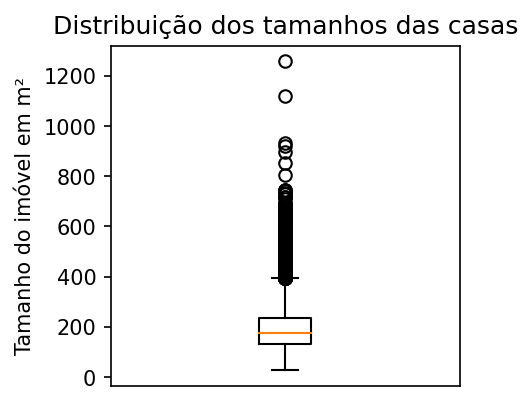

In [40]:
plt.figure(figsize=(3,3), dpi=150)
plt.boxplot(kc_house_data['sqmt_living'])
plt.title('Distribuição dos tamanhos das casas')
plt.ylabel('Tamanho do imóvel em m²')
plt.xticks([])


O gráfico de boxplot mostra a existência de imóveis que podem ser considerados como outliers. Todas as marcações (círculos) acima do limite superior do boxplot, que está localizado em torno de 400 m² são, por definição, considerados outliers. Assim, a distribuição normal dos imóveis está entre algunas dezenas de m² (o menor imóvel do dataset têm cerca de 27m²) e aproximadamente 400m². Segundo o boxplot não há valores considerados outilers para o limite inferior.

Por definição a função ```boxplot``` do Matplotlib o seguinte procedimento para determinar que valores são outliers:
* Calcular a distância entre quartis (3º  quartil - 1º quartil)
* Limite inferior = 1º quartil - 1,5 * (distância entre quartis)
* Limiete superior = 3º quartil + 1,5 * (distância entre quartis)

Assim valores menores que o limite inferior ou maiores que o limite superior são registrados como outliers no boxplot gerado pelo Matplotlib.

Na célula a seguir é realizado o cálculo da quantidade de registros considerados outliers.

In [41]:
limite_outlier = terceiro_quartil + 1.5*(terceiro_quartil - primeiro_quartil)
print(f'Limite superior para considerar um valor como outlier = {limite_outlier:.2f}m²')

numero_outliers = kc_house_data['id'].loc[kc_house_data['sqmt_living'] > limite_outlier].count()
print(f'Quantidade de registros considerados outliers, segundo a variável tamanho do imóvel, é = {numero_outliers}.')

porcentagem_outiers = 100 * numero_outliers/len(kc_house_data)
print(f'Porcentagem de outliers no dataset = {porcentagem_outiers:.2f}%')

Limite superior para considerar um valor como outlier = 393.40m²
Quantidade de registros considerados outliers, segundo a variável tamanho do imóvel, é = 572.
Porcentagem de outliers no dataset = 2.65%


O gráfico mostrou que existem imóveis no limite superior (áreas internas muito grandes) que são consideradas outliers para esta variável. No limite inferior (pequenas áreas) não foram registrados valores considerados outliers. No total foram encontrados 572 imóveis considerados outliers segundo suas áreas o que corresponde a 2,65% dos imóveis do dataset.

# Construção do modelo de Regressão Linear

Para a construçãos dos modelos de regressão linear algumas considerações serão feitas.
* ID é uma coluna de identificação por isto não será utilizada
* ZIPCODE não será utilizado pois apesar de ser representado por um valor numérico não é uma variável que possa ser manipulada como tal pois trata-se de um código de identificação
* date também não pode ser utilizada nos modelos de regressão 
* Ao invés de se utilizar yr_built e Yr_renovated serão utilizadas as colunas com a idade e anos desde a última reforma, pois são valores numéricos com maior sentido para manipulação em modelos matemáticos que anos.
* Todas as colunas mencionadas nesta lista são removidas do DataFrame original na célula a seguir.

In [42]:
kc_house_data = kc_house_data.drop(['id', 'date', 'yr_built', 'yr_renovated', 'zipcode'], axis=1)
kc_house_data.head()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,lat,long,sqmt_living,sqmt_lot,sqmt_above,sqmt_basement,sqmt_living15,sqmt_lot15,age,yrs_renovated
0,221900.0,3,1.00,1.0,0,0,3,7,47.5112,-122.257,109.62554,524.901950,109.62554,0.00000,124.49002,524.901950,59,59
1,538000.0,3,2.25,2.0,0,0,3,7,47.7210,-122.319,238.76071,672.803526,201.59951,37.16120,157.00607,709.686017,63,40
2,180000.0,2,1.00,1.0,0,0,3,6,47.7379,-122.233,71.53531,929.030000,71.53531,0.00000,252.69616,748.983986,82,82
3,604000.0,4,3.00,1.0,0,0,5,7,47.5208,-122.393,182.08988,464.515000,97.54815,84.54173,126.34808,464.515000,49,49
4,510000.0,3,2.00,1.0,0,0,3,8,47.6168,-122.045,156.07704,750.656240,156.07704,0.00000,167.22540,697.051209,28,28


Para que os modelos possam ser comparados é necessário que sejam construídos utilizando os mesmos conjuntos de dados. Assim, na próxima célula e feita a separação do DataFrame em dois conjuntos de dados: treino e teste. Assim, o conjunto de treino será utilizado para treinar os modelos e o de teste para testar seu desempenho após o treino.

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = kc_house_data.drop('price', axis=1)
X_std = StandardScaler().fit_transform(X)
y = kc_house_data['price']
X_treino, X_teste, y_treino, y_teste = train_test_split(X_std, y, test_size=0.3, random_state=10)

Modelo de regressão linear para predizer a variável **price** (preço) com **statsmodels.api**.

In [44]:
import statsmodels.api as sm

X_sm = sm.add_constant(X_treino)
model = sm.OLS(exog=X_sm, endog=y_treino)
sm_reg = model.fit()


In [45]:
sm_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     2109.
Date:                Wed, 11 May 2022   Prob (F-statistic):               0.00
Time:                        22:16:51   Log-Likelihood:            -2.0637e+05
No. Observations:               15129   AIC:                         4.128e+05
Df Residuals:                   15112   BIC:                         4.129e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.387e+05   1653.234    325.835      0.000    5.35e+05    5.42e+05
x1         -3.083e+04   2079.540    -14.824      0.000   -3.49e+04   -2.68e+04
x2          3.248e+04   2999.035     10.832      0.000    2.66e+04    3.84e+04
x3         -1020.2419   2350.174     -0.434      0.664   -5626.866    3586.383
x4          4.998e+04   1819.287     27.475      0.000    4.64e+04    5.36e+04
x5          3.703e+04   1958.321     18.908      0.000    3.32e+04    4.09e+04
x6          1.875e+04   1809.344     10.362      0.000    1.52e+04    2.23e+04
x7          1.207e+05   3077.013     39.215      0.000    1.15e+05    1.27e+05
x8          7.589e+04   1752.891     43.294      0.000    7.25e+04    7.93e+04
x9         -1.736e+04   2012.469     -8.626      0.000   -2.13e+04   -1.34e+04
x10         7.625e+04   1935.485     39.398      0.000    7.25e+04       8e+04
x11         2838.7798   2577.303      1.101      0.271   -2213.046    7890.606
x12         7.242e+04   2067.826     35.023      0.000    6.84e+04    7.65e+04
x13         2.274e+04   1879.652     12.098      0.000    1.91e+04    2.64e+04
x14         2.177e+04   2849.421      7.641      0.000    1.62e+04    2.74e+04
x15        -8739.8866   2443.615     -3.577      0.000   -1.35e+04   -3950.105
x16         5.138e+04      1e+04      5.113      0.000    3.17e+04    7.11e+04
x17         2.205e+04   1.01e+04      2.175      0.030    2179.434    4.19e+04
==============================================================================
Omnibus:                    12300.329   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           900911.226
Skew:                           3.413   Prob(JB):                         0.00
Kurtosis:                      40.183   Cond. No.                     1.05e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.61e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Modelo de regressão usando a biblioteca **sklearn**.

In [46]:
from sklearn.linear_model import LinearRegression

sk_reg = LinearRegression()
sk_reg.fit(X_treino, y_treino)

LinearRegression()

In [47]:
# Geração dos resultados de teste dos modelos

y_pred_sk = sk_reg.predict(X_teste)
y_pred_sm = sm_reg.predict(sm.add_constant(X_teste))

Cálculo dos valores de ${R}^{2}$ e $MAE$.

In [48]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


mae_sk = mae(y_teste, y_pred_sk)
r2_sk = r2_score(y_teste, y_pred_sk)

mae_sm = mae(y_teste, y_pred_sm)
r2_sm = r2_score(y_teste, y_pred_sm)

print(f'MAE regressão sklearn = US$ {mae_sk:.2f}')
print(f'R² regressão sklearn = {r2_sk:.3f}')
print(f'MAE regressão statsmodel = US$ {mae_sm:.2f}')
print(f'R² regressão statsmodel = {r2_sm:.3f}')


MAE regressão sklearn = US$ 123633.72
R² regressão sklearn = 0.704
MAE regressão statsmodel = US$ 123698.87
R² regressão statsmodel = 0.704


Costrução do modelo utilizando a seleção de caracteristicas, selecionando as 5 variaveis mais importantes.

In [49]:
from sklearn.feature_selection import RFE
seletor = RFE(LinearRegression(), n_features_to_select=5, step=1)
seletor = seletor.fit(X_std, y)
X_selected = X_std[:, seletor.support_]
X_treino, X_teste, y_treino, y_teste = train_test_split(X_selected, y, test_size=30, random_state=10)
sk_reg_rfe = LinearRegression()
sk_reg_rfe.fit(X_treino, y_treino)
y_pred = sk_reg_rfe.predict(X_teste)

print('MAE utilizando RFE: US$', mae(y_teste, y_pred))
print('R2 utilizando RFE:', r2_score(y_teste, y_pred))
print('Variáveis selecionadas pelo RFE: ', X.columns[seletor.support_])


MAE utilizando RFE: US$ 128966.16023553052
R2 utilizando RFE: 0.6144954071122278
Variáveis selecionadas pelo RFE:  Index(['waterfront', 'grade', 'lat', 'sqmt_living', 'age'], dtype='object')


Utilizando o método de seleção automático RFE as cinco variáveis seleciondas foram: waterfront, grade, lat, sqmt_living e age.

### Este modelo é melhor do que o anterior?

O valor de R² é 0.61 e o MAE é de US$ 128.966,16. Considerando-se os resultados obtidos o modelo utilizando o RFE teve desempenho inferior ao obtido nos outros modelos. Isso mostra a necessidade de se utilizar uma outra forma de seleção das variáveis mais importantes. Já que existem dentro do dataset variáveis dependentes umas das outras.
Entretanto algumas observações para melhoria do modelo ainda podem ser feitas.

Para a construção de um modelo de regressão é necessário que as variáveis preditoras sejam independentes. O RFE também assume que as variáveis preditoras são independentes. Porém isto não é verdade para todas as variáveis do dataset em uso.

A variável ```sqmt_living``` é a soma de ```sqmt_above``` e ```sqmt_basement```. Assim, para simplificação do modelo pode-se remover as variáveis ```sqmt_above``` e ```sqmt_basement```.
A variável ```grade``` é a nota de avaliação dos imóveis e depende de diversas caracterísitcas do imóvel como: tamanho, localização, condição, vista, etc. Assim, pode-se também remover esta variável para eliminar as variáveis dependentes do conjunto de variáveis preditoras.

A variável ```waterfront``` também é uma variável possível de ser removida. Como mostrado na célula a seguir existem poucos imóveis com vista para o mar. Ao mesmo tempo as casas com vista para o mar são as mais caras do dataset, praticamente outliers dentro do conjunto original, o que pode causar um viés no modelo de regressão.

0    21450
1      163
Name: waterfront, dtype: int64
              count          mean           std       min       25%  \
waterfront                                                            
0           21450.0  5.315636e+05  3.415996e+05   75000.0  320000.0   
1             163.0  1.661876e+06  1.120372e+06  285000.0  760000.0   

                  50%        75%        max  
waterfront                                   
0            450000.0   639897.0  7700000.0  
1           1400000.0  2215000.0  7062500.0  


<AxesSubplot:xlabel='waterfront', ylabel='price'>

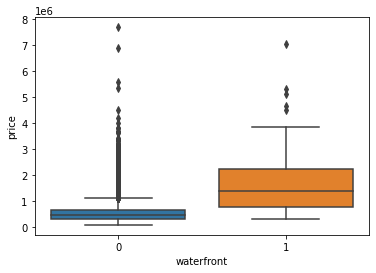

In [50]:
print(kc_house_data['waterfront'].value_counts())
print(kc_house_data.groupby('waterfront')['price'].describe())
sns.boxplot(data=kc_house_data, x='waterfront', y='price')

Considerando-se os fatores expostos novamente será feito o uso da RFE porém desta vez removendo-se as variáveis: ```sqmt_above, sqmt_basement, grade e waterfront```.

In [51]:
X = kc_house_data.drop(['price', 'sqmt_above', 'sqmt_basement', 'grade', 'waterfront'], axis=1)
X_std = StandardScaler().fit_transform(X)
y = kc_house_data['price']
X_treino, X_teste, y_treino, y_teste = train_test_split(X_std, y, test_size=0.3, random_state=10)
seletor = RFE(LinearRegression(), n_features_to_select=5, step=1)
seletor = seletor.fit(X_std, y)
X_selected = X_std[:, seletor.support_]
X_treino, X_teste, y_treino, y_teste = train_test_split(X_selected, y, test_size=30, random_state=10)
sk_reg_rfe = LinearRegression()
sk_reg_rfe.fit(X_treino, y_treino)
y_pred = sk_reg_rfe.predict(X_teste)

print('MAE utilizando RFE: US$', mae(y_teste, y_pred))
print('R2 utilizando RFE:', r2_score(y_teste, y_pred))
print('Variáveis selecionadas pelo RFE: ', X.columns[seletor.support_])

MAE utilizando RFE: US$ 99808.99585486282
R2 utilizando RFE: 0.8535992104623031
Variáveis selecionadas pelo RFE:  Index(['bathrooms', 'view', 'lat', 'sqmt_living', 'age'], dtype='object')


Como visto após uma seleção mais cuidadosa o uso do RFE mostrou-se eficaz para redução da complexidade do modelo ao mesmo tempo em que melhora as previsões do modelo:
O modelo final teve MAE de US$ 99.809,00 e R² de 0.85. Valores consideravelmente melhores que os obtidos nos modelos anteriores.
A cinco variáveis principais são: ```bathrooms, view, lat, sqmt_living, age```.
